# Explaining cortical thickness development: Modelled cortical thickness data

In [1]:
import os

import numpy as np
import pandas as pd
from glob import glob

from os.path import join
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from IPython.display import display
import imageio.v2 as iio

# custom functions 
from scripts.braincharts import get_centile_predictions # wrapper around PCNtoolkit/braincharts
from scripts.templates import get_destrieux
from scripts.plots_brain import get_parc_gifti_region, plot_surf_ax

# working path
wd = os.path.dirname(os.path.realpath("__file__"))
print("Working directory:", wd)

# cortical thickness model path
ct_model_dir = join(wd, "model_rutherford", "lifespan_57K_82sites")
plot_dir = join(wd, "plots", "braincharts")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Working directory: /Users/llotter/projects/CTdev


## Get parcellation (Destrieux, fsaverage)

In [2]:
parc_destrieux, destrieux_idps = get_destrieux()

# save one time for reference
np.savetxt(join(wd, "model_rutherford", "idps_destrieux.txt"), np.array(destrieux_idps), "%s")
for parc, hemi in zip(parc_destrieux, ["L", "R"]):
    parc.to_filename(join(wd, "templates", f"destrieux.fsa.10k.{hemi}.label.gii"))

## Get main cortical thickness data (Rutherford)

Adapted from Rutherford et al, 2022:  
Tutorial notebook: [https://pcntoolkit.readthedocs.io/en/latest/pages/apply_normative_models.html](https://pcntoolkit.readthedocs.io/en/latest/pages/apply_normative_models.html)  
Dataset source: [https://github.com/predictive-clinical-neuroscience/braincharts](https://github.com/predictive-clinical-neuroscience/braincharts)  
Associated Paper: [https://elifesciences.org/articles/72904](https://elifesciences.org/articles/72904)

### Get "ideal" predicted CT data

In [3]:
# centiles to extract (as used by rutherford et al.)
centiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
step = 2

# iterate sexes
temp = dict()
for sex in ["f", "m"]:
    
    # ideal predictions by sex
    # covariate lists 'age' & 'sex' will be overwritten in iteration but they are the same anyways
    temp[sex], age, sex = get_centile_predictions(
        model_dir=ct_model_dir,
        site_ids_tr=list(np.loadtxt(join(wd, "model_rutherford", "site_ids_82sites.txt"), dtype=str)),
        idps=destrieux_idps,
        sex=sex, 
        age_min=-5, 
        age_max=110, 
        age_step=step, 
        centiles=centiles,
    )
    
# store in independent arrays for ease of use  
predicted_ct_f, predicted_ct_m = temp["f"], temp["m"]

Iterating IDPs:   0%|          | 0/148 [00:00<?, ?it/s]

IDP 0: lh_G&S_frontomargin_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 1: lh_G&S_occipital_inf_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 2: lh_G&S_paracentral_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 3: lh_G&S_subcentral_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 4: lh_G&S_transv_frontopol_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 5: lh_G&S_cingul-Ant_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 6: lh_G&S_cingul-Mid-Ant_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 7: lh_G&S_cingul-Mid-Post_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 8: lh_G_cingul-Post-dorsal_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 9: lh_G_cingul-Post-ventral_thickness
Loading data ...
Prediction by 

Iterating IDPs:   0%|          | 0/148 [00:00<?, ?it/s]

IDP 0: lh_G&S_frontomargin_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 1: lh_G&S_occipital_inf_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 2: lh_G&S_paracentral_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 3: lh_G&S_subcentral_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 4: lh_G&S_transv_frontopol_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 5: lh_G&S_cingul-Ant_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 6: lh_G&S_cingul-Mid-Ant_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 7: lh_G&S_cingul-Mid-Post_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 8: lh_G_cingul-Post-dorsal_thickness
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
IDP 9: lh_G_cingul-Post-ventral_thickness
Loading data ...
Prediction by 

### Check and save data

In [4]:
# save 3d data array and index vectors
np.save(join(wd, "data_rutherford", "ct_predicted_f.npy"), predicted_ct_f)
np.save(join(wd, "data_rutherford", "ct_predicted_m.npy"), predicted_ct_m)
np.savetxt(join(wd, "data_rutherford", "ct_predicted_parcels.txt"), np.array(destrieux_idps), '%s')
np.savetxt(join(wd, "data_rutherford", "ct_predicted_centiles.txt"), np.array(centiles), '%.3f')
np.savetxt(join(wd, "data_rutherford", "ct_predicted_tps.txt"), np.array(age), '%.2f')

print(f"Shape ct_predicted_f: parcels x tps x centiles {predicted_ct_f.shape}")
print(f"Shape ct_predicted_m: parcels x tps x centiles {predicted_ct_m.shape}")

Shape ct_predicted_f: parcels x tps x centiles (148, 230, 7)
Shape ct_predicted_m: parcels x tps x centiles (148, 230, 7)


## Plot cortex development

### Plot percentiles

In [5]:
# If this is rerun and single-subject data is not available (i.e., if you downloaded this file from 
# GitHub), you will have to set 'plot_scatter' to False.
plot_lines = True

In [78]:
from matplotlib.collections import LineCollection
from scripts.utils import na
from tqdm.auto import tqdm

if plot_lines:
    # single subject data
    data_cross = pd.read_feather(join(wd, "data_ABCD-IMGN", "data_cross.ftr")) \
        .set_index(["ds", "id", "tp"]).sort_index()
    imgn = pd.read_feather(join(wd, "data_ABCD-IMGN", "imgn.ftr")) \
        .set_index(["id", "tp"], drop=False).sort_index()
    abcd = pd.read_feather(join(wd, "data_ABCD-IMGN", "abcd.ftr")) \
        .set_index(["id", "tp"], drop=False).sort_index()

# x axis (years)
xx_plot = np.arange(0, 90.1, 1/step)
# percentiles
percentiles_plot = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
# position of median
med_idx = int(len(percentiles_plot) / 2)
# IDPs
destrieux_idps_bilat = [l.replace("lh_","") for l in destrieux_idps[:int(len(destrieux_idps)/2)]]
# ylims
ylims = list()
for a in [predicted_ct_f, predicted_ct_m]:
    ylims.append(a[:,[age.index(i) for i in xx_plot],:].min())
    ylims.append(a[:,[age.index(i) for i in xx_plot],:].max())
ylims = (min(ylims), max(ylims))

for idp in tqdm(destrieux_idps_bilat):
    # get idps
    idp_destrieux_lh = "lh_" + idp
    idp_destrieux_rh = "rh_" + idp
    
    # this idp data
    idp_data = dict(
        destrieux_lh_f = pd.DataFrame(predicted_ct_f[destrieux_idps.index(idp_destrieux_lh),:,:], 
                                      index=age, columns=centiles).loc[xx_plot, percentiles_plot],
        destrieux_lh_m = pd.DataFrame(predicted_ct_m[destrieux_idps.index(idp_destrieux_lh),:,:], 
                                      index=age, columns=centiles).loc[xx_plot, percentiles_plot],
        destrieux_rh_f = pd.DataFrame(predicted_ct_f[destrieux_idps.index(idp_destrieux_rh),:,:], 
                                      index=age, columns=centiles).loc[xx_plot, percentiles_plot],
        destrieux_rh_m = pd.DataFrame(predicted_ct_m[destrieux_idps.index(idp_destrieux_rh),:,:], 
                                      index=age, columns=centiles).loc[xx_plot, percentiles_plot],
    )

    # figure
    fig = plt.figure(figsize=(10.5,11))
    gs = fig.add_gridspec(
        3,2, 
        height_ratios=(0.55,1,1), 
        wspace=0.1,
        hspace=0.15)
    
    # plot brain
    ax_brain = fig.add_subplot(gs[0,:])
    lh, rh = get_parc_gifti_region(
        region_lh=destrieux_idps.index(idp_destrieux_lh)+1, 
        region_rh=destrieux_idps.index(idp_destrieux_rh)+1,
        parc_gifti=parc_destrieux
    )
    plot_surf_ax(ax=ax_brain, fig=fig, lh=lh, rh=rh, plot="region", c_fill="Reds_r", c_outline="Greys")
    ax_brain.set_title(idp, weight="semibold", size=13)
    
    # plot trajectories
    for i_hemi, hemi in zip([0, 1],
                            ["lh", "rh"]):
        for i_sex, sex, color in zip([1, 2],
                                     ["f", "m"], 
                                     ["tab:blue", "tab:green"]):
            # get data
            data = idp_data[f"destrieux_{hemi}_{sex}"]
            # get ylims
            if hemi=="rh":
                ylims = ax.get_ylim()
            # subplot
            ax = fig.add_subplot(gs[i_sex, i_hemi])
            # fill space
            for i in range(med_idx):
                ax.fill_between(xx_plot, data.iloc[:, med_idx-i-1], data.iloc[:, med_idx+i+1], 
                                alpha=0.1, color=color)   
            # plot actual centile lines
            for p in range(len(percentiles_plot)):
                ax.plot(xx_plot, data.iloc[:,p], color=color, alpha=0.7, linewidth=1)
            # highlight median
            ax.plot(xx_plot, data.iloc[:,med_idx], color)
            
            # plot single subject data
            if plot_lines:
                
                for df_single, ds, c in zip(
                    [abcd, imgn],
                    ["abcd", "imgn"],
                    ["tab:purple", "tab:orange"]):
                    
                    # Sex-specific single subject data
                    subs = data_cross.loc[(ds, na(), na()), "EstimatedTotalIntraCranialVol-rescaled"].dropna().index.get_level_values("id").unique().tolist()
                    subs = [sub for sub in subs if sub in df_single.loc[df_single.sex_str==sex.upper(), "id"]]

                    # data
                    temp = data_cross.loc[(ds, subs, na()), ["age", f"{hemi}_{idp}-rescaled"]].droplevel("ds")
                   
                    # plot
                    ax.add_collection(
                        LineCollection(
                            [temp.loc[sub] for sub in temp.index.get_level_values("id")],
                            alpha=0.05 if ds=="imgn" else 0.03,
                            color=c,
                            lw=0.1,
                            zorder=100,
                            label=f"{'ABCD' if ds=='abcd' else 'IMAGEN'}\n$(n={len(subs)})$"
                        )
                    )
                    
            # # details
            ax.set_title(f"{'Left' if hemi=='lh' else 'Right'} hemisphere: {'female' if sex=='f' else 'male'}")   
            ax.set_xlim((0,90))
            ax.set_ylim(ylims)
            if sex=="m":
                ax.set_xlabel("Age")
            else:
                 ax.set_xticklabels([])
            ax.grid()
            if hemi=="rh":
                ax.set_yticklabels([])
                if plot_lines:
                    leg = ax.legend(loc="center left", bbox_to_anchor=(1,0.5), handletextpad=0.2)
                    for handle in leg.legend_handles:
                        handle._linewidth = 2
                        handle._alpha = 0.5
            else:
                ax.set_ylabel("Cortical thickness")
            
    plt.savefig(
        join(plot_dir, f"braincharts_{destrieux_idps_bilat.index(idp):02d}_{idp}.png"),  
        bbox_inches="tight", dpi=150
    )
    #plt.show()
    plt.close()

  0%|          | 0/74 [00:00<?, ?it/s]

Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1


### Create gif

In [7]:
imgs = glob(join(plot_dir, "braincharts_*.png"))
imgs.sort()
frames = []
[frames.append(iio.imread(i)) for i in imgs]
iio.mimwrite(join(plot_dir, "braincharts_animation.gif"), frames, fps=1.5)

## Age distribution

In [4]:
# data from publication (Rutherford et al., 2022, eLife)

n_subs = 58836
age_pub = pd.DataFrame([dict(
        n_sites=82,
        n_subs=n_subs,
        n_female=round(n_subs * ((0.511+0.509)/2)),
        n_male=round(n_subs * ((0.489+0.491)/2)),
        age_mean=46.9,
        age_sd=24.4
    )])
age_pub.to_csv(join(wd, "data_rutherford", "age_pub.csv"), index=None)
display(age_pub)

,n_sites,n_subs,n_female,n_male,age_mean,age_sd
0,82,58836,30006,28830,46.9,24.4


In [5]:
# data from repo

age_rutherford = pd.read_csv(join(wd, "model_rutherford", "all_age_eLife.csv"))
age_main = age_rutherford.query("test_label in ['controls test', 'controls train']")

# summary stats
print("All subjects (test+train)")
display(age_main.describe())
print("By group")
display(age_main.groupby("test_label").describe())

All subjects (test+train)


,age
count,58834.000000
mean,46.967462
std,24.393133
min,2.091667
25%,19.000000
50%,57.000000
75%,67.000000
max,100.000000


By group


age                                                    \
                  count       mean        std       min   25%   50%   75%   
test_label                                                                  
controls test   29416.0  46.967618  24.390227  2.234167  19.0  57.0  67.0   
controls train  29418.0  46.967305  24.396454  2.091667  19.0  57.0  67.0   

                       
                  max  
test_label             
controls test   100.0  
controls train  100.0

In [6]:
## Function to add developmental stages (aligned to CT change period mean, e.g. delta(5,10) = 7.5)
def add_stages(
    ax, height=0.09,
    alignment=-2.5,
    stages=[(6,12), (12,20), (20,40), (40,60), (60,100)],
    stage_names=["Late childhood", "Adolescence", "Young adulthood", "Middle adulthood", "Late adulthood"]
    ):
    
    ax_stages = ax.inset_axes((0, 1, 1, height))
    ax_stages.set_xlim(ax.get_xlim())
    ax_stages.set_ylim(0,1)
    ax_stages.set_axis_off()
    
    for i, x_range in enumerate(stages):
        x0 = x_range[0] - 5 + alignment
        x1 = x_range[1] - 5 + alignment
        if x_range[0] > 10:
            ax_stages.axvline(
                x0, 
                c="0.3",
                lw=1,
                zorder=0
            )
        if x0 < 2:
            x0 = -5
        if x1 > 90:
            x1 = 80
        ax_stages.text(
            x=(x0 + x1) / 2,
            y=0.5,
            s=f"{stage_names[i]}\n${x_range[0]} - {x_range[1]}\ y.$",
            ha="center",
            va="center"
        )

0–1        0
1–2        0
2–3       58
3–4       74
4–5       15
5–6       54
6–7       64
7–8      108
8–9      315
9–10    5683
dtype: int64

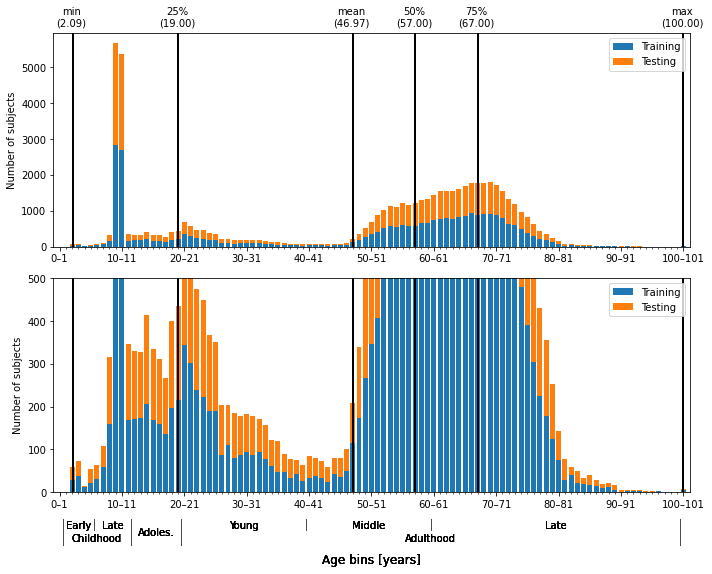

In [27]:
# distribution
hist_train = np.histogram(age_main[age_main.test_label=="controls train"].age, range=(0,110), bins=110)
hist_test = np.histogram(age_main[age_main.test_label=="controls test"].age, range=(0,110), bins=110)
age_stats = age_main.describe().drop(["std", "count"])
display(pd.Series(hist_train[0] + hist_test[0], index=[f"{i}–{i+1}" for i in np.arange(0,110,1)]).head(10))

# plot
fig, axes = plt.subplots(2,1, figsize=(10,8))

# iterate all and zoomed-in axes
for ax in axes:
    
    # hist
    for hist, lab in zip([hist_train, hist_test], ["Training", "Testing"]):
        ax.bar(
            range(0,110),
            height=hist[0],
            bottom=hist_train[0] if lab=="Testing" else None,
            label=lab
        )
        
    # stats
    for stat in age_stats.index:
        ax.axvline(
            age_stats.loc[stat, "age"], 
            c="k", 
            lw=2
        )
        
    # design
    ax.set_ylabel("Number of subjects")
    ax.set_xticks(np.arange(0,101,10))
    ax.set_xticklabels([f"{i}–{i+1}" for i in np.arange(0,101,10)])
    ax.set_xticks(np.arange(0,101,1), minor=True)
    ax.set_xlim(-1,101)
    ax.legend()
    
    
# stats annotation
for stat in age_stats.index:
    axes[0].annotate(
        f"{stat}\n({age_stats.loc[stat,'age']:.02f})", 
        xy=(age_stats.loc[stat,"age"]/102+0.008, 1.03), 
        xycoords="axes fraction", 
        ha="center"
    )
    
# design
axes[1].set_ylim(0,500)

# developmental stages
stages=[(6,12), (12,20), (20,40), (40,60), (60,100)]
stage_names=["Late childhood", "Adolescence", "Young adulthood", "Middle adulthood", "Late adulthood"]
    
ax_stages = axes[1].inset_axes((0, -0.25, 1, 0.125))
ax_stages.set_xlim(ax.get_xlim())
ax_stages.set_ylim(0,1)
ax_stages.set_axis_off()

for i, x_range in enumerate(stages):
    # full lines
    [ax_stages.axvline(x - 0.5, c="0.3", lw=1) for x in [1, 12, 20, 100]]
    # half lines
    [ax_stages.axvline(x - 0.5, c="0.3", lw=1, ymin=0.6) for x in [6, 40, 60]]
    # headings
    for s, x in zip(["Childhood", "Adulthood"], [np.mean([1,12]), np.mean([20,100])]):
        ax_stages.text(x=x - 0.5, y=0.25, s=s, ha="center", va="center")
    # subheadings
    for s, x in zip(["Early", "Late", "Adoles.", "Young", "Middle", "Late"], 
                    [np.mean([1,6]), np.mean([6,12]), np.mean([12,20]), np.mean([20,40]), np.mean([40,60]), np.mean([60,100])]):
        ax_stages.text(x=x - 0.5, y=0.5 if "Adol" in s else 0.75, s=s, ha="center", va="center")
    # label
    ax_stages.text(
        s="Age bins [years]",
        x=50,
        y=-0.55,
        size=12,
        ha="center",
        va="center"
    )

# finalize
plt.tight_layout()
fig.savefig(join(plot_dir, "braincharts_age.pdf"), bbox_inches="tight")

# source
pd.DataFrame(
    {
        "age_bins": [f"{i:.0f}-{i+1:.0f}" for i in hist_train[1][:-10]],
        "hist_train": hist_train[0][:-9],
        "hist_test": hist_test[0][:-9]
    }
) \
    .set_index("age_bins") \
    .to_csv(join(plot_dir, "braincharts_age_source.csv"))